Simple Linear Regression Model:
Intercept (b0): 25918.438334893202
Slope (b1): 9339.081723815198
RMSE: 6146.92300799458
MAE: 5161.328710400183
R2 Score: 0.9414466227178214

Sklearn Linear Regression Model:
Intercept: 25918.438334893202
Slope: 9339.081723815198
RMSE: 6146.92300799458
MAE: 5161.328710400183
R2 Score: 0.9414466227178214


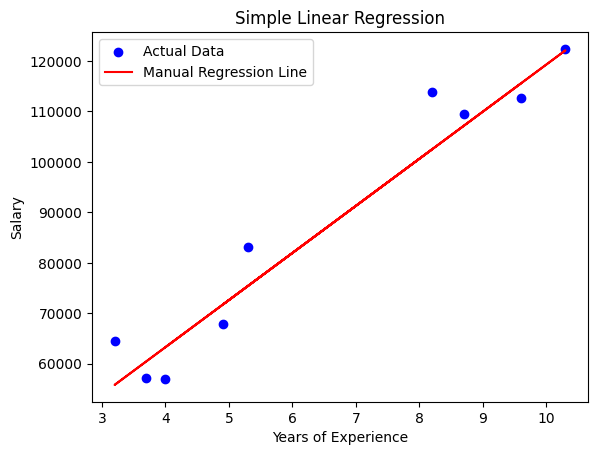

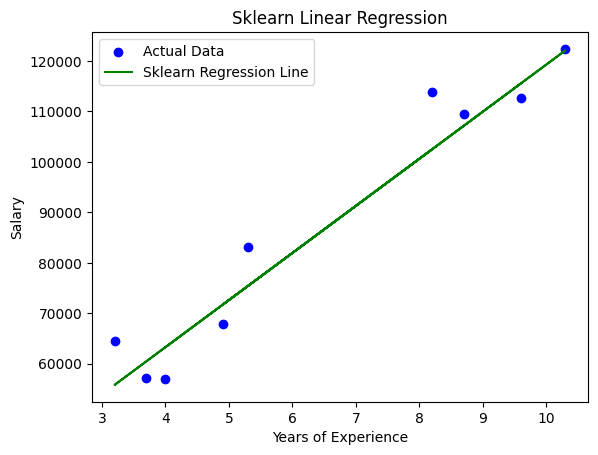

In [6]:
#Name: Aliyan Ahmed Cheema
#Reg # FA22-BCE-028
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv('/content/SalaryData.csv') #the file is being from the session storage on Colab. change if path is different
X = data['YearsExperience'].values.reshape(-1, 1)  # Ensure X is a 2D array
Y = data['Salary'].values  # Target

# Split dataset (70% training, 30% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Implement Simple Linear Regression (without sklearn)
def simple_linear_regression(X, Y):
    X = X.flatten()  # Ensure X is a 1D array
    mean_X, mean_Y = np.mean(X), np.mean(Y)

    numerator = np.sum((X - mean_X) * (Y - mean_Y))
    denominator = np.sum((X - mean_X) ** 2)
    b1 = numerator / denominator if denominator != 0 else 0  # Avoid division by zero
    b0 = mean_Y - (b1 * mean_X)

    return b0, b1

def predict(X, b0, b1):
    return b0 + b1 * X.flatten()

# Train the model
b0, b1 = simple_linear_regression(X_train, Y_train)

# Predictions
Y_pred_train = predict(X_train, b0, b1)
Y_pred_test = predict(X_test, b0, b1)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
mae = mean_absolute_error(Y_test, Y_pred_test)
r2 = r2_score(Y_test, Y_pred_test)

# Print results
print("Simple Linear Regression Model:")
print(f"Intercept (b0): {b0}")
print(f"Slope (b1): {b1}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

# Train using sklearn
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred_sklearn = lr.predict(X_test)

# Evaluate sklearn model
rmse_sklearn = np.sqrt(mean_squared_error(Y_test, Y_pred_sklearn))
mae_sklearn = mean_absolute_error(Y_test, Y_pred_sklearn)
r2_sklearn = r2_score(Y_test, Y_pred_sklearn)

# Print sklearn results
print("\nSklearn Linear Regression Model:")
print(f"Intercept: {lr.intercept_}")
print(f"Slope: {lr.coef_[0]}")
print(f"RMSE: {rmse_sklearn}")
print(f"MAE: {mae_sklearn}")
print(f"R2 Score: {r2_sklearn}")

# Plot results
plt.scatter(X_test, Y_test, color='blue', label='Actual Data')
plt.plot(X_test, Y_pred_test, color='red', label='Manual Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

plt.scatter(X_test, Y_test, color='blue', label='Actual Data')
plt.plot(X_test, Y_pred_sklearn, color='green', label='Sklearn Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Sklearn Linear Regression')
plt.legend()
plt.show()
